# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 9 de octubre, 2020 23:59
</div>

In [1]:
from sympy import *
from sympy import Symbol
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['eye', 'floor', 'cos', 'minimum', 'ifft', 'reshape', 'flatten', 'roots', 're', 'lcm', 'zeros', 'deprecated', 'var', 'beta', 'sign', 'interactive', 'product', 'multinomial', 'power', 'gamma', 'conjugate', 'sinc', 'take', 'plot', 'plotting', 'Polygon', 'solve', 'sinh', 'tanh', 'tan', 'pi', 'maximum', 'source', 'binomial', 'gcd', 'mod', 'poly', 'exp', 'Circle', 'partition', 'prod', 'diff', 'vectorize', 'fft', 'trace', 'diag', 'Line2D', 'trunc', 'add', 'sin', 'log', 'Number', 'det', 'transpose', 'cosh', 'ones', 'cbrt', 'test', 'array', 'nan', 'invert', 'seterr', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [2]:
i = Symbol('i')
x = Symbol('x')
y = Symbol('y')
b0 = Symbol('beta_0')
b1 = Symbol('beta_1')
n = Symbol('n')
j = Function('j')
j = Sum((Indexed(y,i) - b0 - b1 * Indexed(x,i))**2, (i, 1, n))/(2*n)
j

Sum((-beta_0 - beta_1*x[i] + y[i])**2, (i, 1, n))/(2*n)

In [3]:
j_0 = Function('j_0')
j_0 = simplify(Derivative(Sum(( Indexed(y,i) - b0 - b1 * Indexed(x,i))**2, (i, 1, n))/(2*n), b0).doit())
j_0

Sum(beta_0 + beta_1*x[i] - y[i], (i, 1, n))/n

In [4]:
j_1 = simplify(Derivative(j, b1).doit())
j_1

Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, n))/n

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

a)

In [5]:
def J(b0, b1):
    X = np.loadtxt('edad.dat')
    Y = np.loadtxt('altura.dat')
    costo = 0
    for i in range (0, len(Y)):
        costo += ((Y[i] - b0 - (b1*X[i]))**2)/(2*len(Y))
    return costo

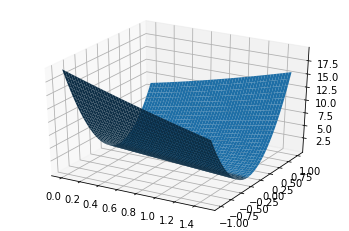

In [7]:
b0 = np.arange(0, 1.5, 0.001)
b1 = np.arange(-1, 1, 0.001)
B0, B1 = np.meshgrid(b0, b1)
funJ = J(B0,B1)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.plot_surface(B0,B1, funJ)

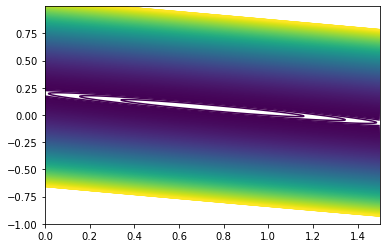

In [8]:
grafCont = plt.contour(B0, B1, funJ, levels = np.arange(0,10,0.01))
grafCont

In [9]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
            
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

In [10]:
def plotModelo(x,y,rl,iteracion, ejex, ejey):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel(ejex)
    ax[0].set_ylabel(ejey)
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [11]:
X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')
r = RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


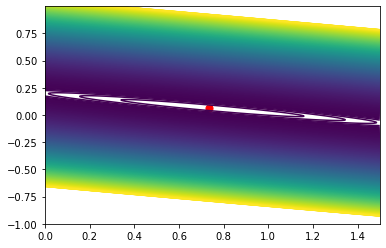

In [12]:
plt.contour(B0,B1, funJ, levels = np.arange(0,10,0.01))
plt.scatter(0.73300235,0.06700325,50, color = 'red')

c)

In [14]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)
def plotContorno(iteracion):
    _beta = r.historia['beta'][iteracion]
    fig = plt.figure()
    plt.contour(B0,B1,funJ, levels = np.arange(0,10,0.01))
    plt.scatter(_beta[0],_beta[1], 50, color = 'red')
interact(plotContorno, iteracion=(0,ultima_iteracion,10));

interactive(children=(IntSlider(value=590, description='iteracion', max=1189, step=10), Output()), _dom_classe…

d)

In [15]:
def plotModeloA(x,y,alpha,iteracion, ejex, ejey):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    rl = RegresionLineal(alpha, max_iters=10000, tols=0.0000001)
    rl.gradientDescent(x, y)
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    
    ax[0].set_xlabel(ejex)
    ax[0].set_ylabel(ejey)
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")


In [16]:
interact(plotModeloA, x=fixed(X), y=fixed(Y), alpha=(0,.1,.0001), iteracion=(0,ultima_iteracion,10),ejex=fixed("Edad (yr)"),ejey=fixed("Altura(m)"));

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.1, step=0.0001), IntSlider(value=590,…

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [4]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [18]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
arch=open('chirps.txt','r')
tex=arch.read()
arch.close()
x=[]
y=[]
X=[]
Y=[]
tex = tex.splitlines()
for i in range(len(tex)):
    tmp = tex[i].split("\t")
    if i==0:
        continue
    y.append(float(tmp[1]))
    Y.append(float(tmp[1]))
    x.append([1,float(tmp[0])])
    X.append(float(tmp[0]))
x=matrix(x)
y=matrix(y).T
b=((x.T*x).I)*(x.T*y)
b

Populating the interactive namespace from numpy and matplotlib


matrix([[22.84898231],
        [ 3.410323  ]])

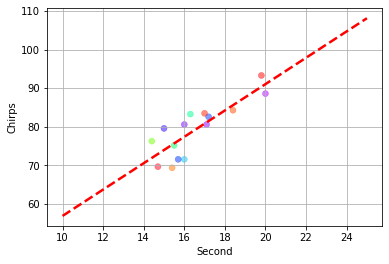

In [21]:
#Generación de colores
theta = 2 * np.pi * np.random.rand(15)

colors = theta
#Graficar puntos
plt.scatter(X,Y, label="data",c=colors,alpha=0.5, linewidth=.5, linestyle="-",cmap='hsv')
#Titulo
plt.xlabel('Second')
plt.ylabel('Chirps')
#Graficar recta
plt.plot([10,25],[float(b[0])+10*float(b[1]),float(b[0])+25*float(b[1])],color="red", linewidth=2.5, linestyle="--")
plt.grid(True)

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [25]:
Anscombe = np.loadtxt("quartet.txt", dtype="float", delimiter=",", skiprows=1)

In [26]:
A1 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A1.gradientDescent(Anscombe[:,0], Anscombe[:,1])

La función convergió con beta: [3.00008683 0.50009131] en la iteración 41286


In [32]:
A3 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A3.gradientDescent(Anscombe[:,4], Anscombe[:,5])

La función convergió con beta: [3.00244952 0.49972777] en la iteración 40652


In [33]:
A4 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A4.gradientDescent(Anscombe[:,6], Anscombe[:,7])

La función convergió con beta: [3.00172424 0.49990939] en la iteración 42197


## Problema 5

Use el archivo `radioactive_decay.dat`

In [5]:
%cat dat a/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

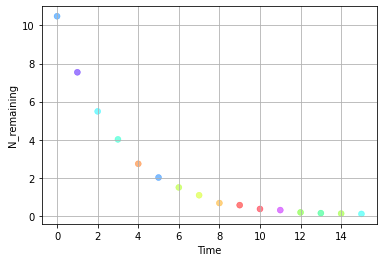

In [36]:
arch=open('radioactive_decay.txt','r')
tex=arch.read()
arch.close()

X=[]
Y=[]
tex = tex.splitlines()
for i in range(len(tex)):
    tmp = tex[i].split("\t")
    if i==0:
        continue
    Y.append(float(tmp[1]))
    X.append(float(tmp[0]))
#Generación de colores
theta = 2 * np.pi * np.random.rand(16)

colors = theta
plt.scatter(X,Y, label="data",c=colors,alpha=0.5, linewidth=.5, linestyle="-",cmap='hsv')
plt.xlabel('Time')
plt.ylabel('N_remaining')
plt.grid(True)

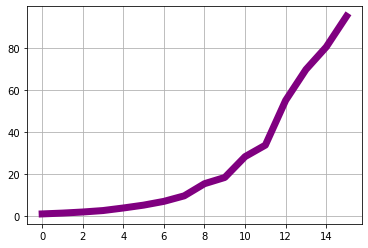

In [37]:
plt.plot([i for i in range(0,16)],[10.48/i for i in Y],color="purple", linewidth=7, linestyle="-")
plt.grid(True)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

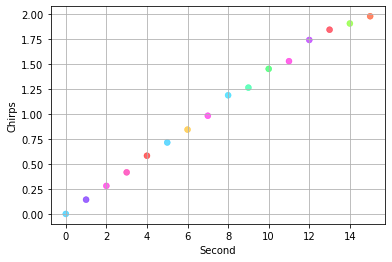

In [38]:
#Hay que aplicar funcion de logaritmo, ya que se asemeja a una exponencial
Y=[np.log10(10.48/i) for i in Y]
theta = 2 * np.pi * np.random.rand(16)

colors = theta
plt.scatter(X,Y, label="data",c=colors,alpha=0.6, linewidth=.5, linestyle="-",cmap='hsv')
plt.xlabel('Second')
plt.ylabel('Chirps')
plt.grid(True)

In [39]:
file=open('transform_radioactive_decay.txt','w')
for i in range(len(X)+1):
    if i==0:
        file.write('Time \t log10(10.48/N_remaining) \n')
        continue
    file.write(str(X[i-1])+'\t'+str(Y[i-1])+'\n')
file.close()
%cat transform_radioactive_decay.txt

Time 	 log10(10.48/N_remaining) 
0.0	0.0
1.0	0.1429899367779338
2.0	0.28078893819761597
3.0	0.4161352295632379
4.0	0.5826107198273198
5.0	0.7150099132010841
6.0	0.8442700235920266
7.0	0.9829347847070842
8.0	1.1878523699414716
9.0	1.2644864269752165
10.0	1.4521595585807128
11.0	1.5289995888134351
12.0	1.741607681694879
13.0	1.8442700235920266
14.0	1.906417930340871
15.0	1.9789685974894828


**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

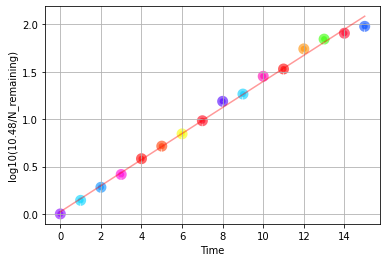

In [41]:
arch=open('transform_radioactive_decay.txt','r')
tex=arch.read()
arch.close()
x=[]
y=[]
X=[]
Y=[]
tex = tex.splitlines()
for i in range(len(tex)):
    tmp = tex[i].split("\t")
    if i==0:
        continue
    y.append(float(tmp[1]))
    Y.append(float(tmp[1]))
    x.append([1,float(tmp[0])])
    X.append(float(tmp[0]))
x=matrix(x)
y=matrix(y).T
b=((x.T*x).I)*(x.T*y)
theta = 2 * np.pi * np.random.rand(16)

colors = theta
plt.scatter(X,Y, label="data",c=colors,alpha=0.6, linewidth=5, linestyle="--",cmap='hsv')
plt.xlabel('Time')
plt.ylabel('log10(10.48/N_remaining)')
plt.plot([0,15],[float(b[0])+0*float(b[1]),float(b[0])+15*float(b[1])],color='red',alpha=0.4)
plt.grid(True)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [42]:
print(float(b[0]),float(b[1]))

0.022954071025364176 0.1375186382240714
